In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Non si applica lo scaling a y essendo una variabile che puo essere solo 0 o 1.

Non è obbligatorio fare lo scaling con questo modello, ma è comunque consigliato per migliorare il risultato



In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

metric: metrica usata per misurare la distanza

p: potenza

n_neighborns: numero dei punti da prendere in 
considerazione nei dintorni del punto di test

weight: pesi da dare ai punti campionati

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=2, n_neighbors=5, metric="minkowski")
classifier.fit(X_train, y_train)

KNeighborsClassifier()

predict mostra solo true o false, mentre pred_proba mostra la probabilità calcolata.

In [7]:
y_pred = classifier.predict(sc.transform([[30,87000]]))
print(y_pred)
y_pred_proba = classifier.predict_proba(sc.transform([[30,87000]]))
print(y_pred_proba)

[0]
[[1. 0.]]


In [8]:
y_pred = classifier.predict(X_test)
delta = abs(y_pred-y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1), delta.reshape(len(delta),1) ), axis=1))

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 1 1]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]]


a00 = Veri Negativi. previsto non acquisto, effettivamente non acquistato

a10 = Falso Negativo. Previsto non acquisto, hanno invece acquistato

a01 = Falso Positivo. Previsto acquisto ma non hanno acquistato

a11 = Veri Positivi. previsto acquisto e hanno acquistato

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

Per classificare i dati è necessario mostrare la linea (essendo modello lineare) che divide gli acquirenti dai non acquirenti

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


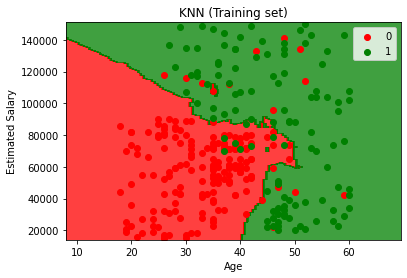

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


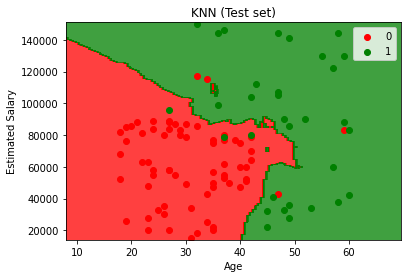

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()